In [1]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data= pd.read_csv('C:/Users/charl/Downloads/Dry_Bean.csv', index_col=0)
data.head()

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,,,,,,,,,,,,,,,,
28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.columns

Index(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [4]:

data.isna().sum()

Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])
#"Class에만 Encoding진행"

In [6]:
data

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,,,,,,,,,,,,,,,,
28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3


In [25]:
sample_data = data.sample(frac=0.5)

In [26]:
sample_data

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,,,,,,,,,,,,,,,,
61453,964.166,369.296179,213.198804,1.732168,0.816524,62238,279.721987,0.802332,0.987387,0.830710,0.757446,0.006009,0.001220,0.573725,0.993788,2
89031,1135.554,429.780643,266.979016,1.609792,0.783653,90324,336.686486,0.733417,0.985685,0.867632,0.783391,0.004827,0.001122,0.613702,0.987933,2
30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
61843,954.292,347.106522,227.566931,1.525294,0.755099,62526,280.608184,0.775908,0.989077,0.853371,0.808421,0.005613,0.001479,0.653544,0.996848,0
43753,782.625,269.717529,206.839051,1.303997,0.641799,44377,236.025528,0.782491,0.985939,0.897657,0.875084,0.006165,0.002230,0.765772,0.998565,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42780,801.214,322.594105,169.394536,1.904395,0.851040,43293,233.386349,0.800764,0.988151,0.837440,0.723467,0.007541,0.001274,0.523405,0.996770,4
81085,1135.253,411.897221,251.340592,1.638801,0.792246,82646,321.310797,0.767327,0.981112,0.790615,0.780075,0.005080,0.001160,0.608517,0.997239,0
82124,1107.831,437.316754,240.869571,1.815575,0.834644,82957,323.362837,0.727141,0.989959,0.840878,0.739425,0.005325,0.000982,0.546749,0.992664,2


In [27]:
data.isnull().sum()

Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [28]:
X = sample_data.iloc[:,0:7].values
y = sample_data['Class']

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [33]:
X.shape

(6806, 7)

In [34]:
Y.shape

(6806, 7)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(60,input_shape=(7,),activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.00048), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 60)                480       
                                                                 
 dense_17 (Dense)            (None, 60)                3660      
                                                                 
 dense_18 (Dense)            (None, 30)                1830      
                                                                 
 dense_19 (Dense)            (None, 7)                 217       
                                                                 
Total params: 6,187
Trainable params: 6,187
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
171/171 [==============================] - 2s 7ms/step - loss: 233.7758 - accuracy: 0.1563 - val_loss: 79.2135 - val_accuracy: 0.1021
Epoch 2/100
171/171 [==============================] - 1s 5ms/step - loss: 105.9358 - accuracy: 0.1708 - val_loss: 171.4022 - val_accuracy: 0.1256
Epoch 3/100
171/171 [==============================] - 1s 5ms/step - loss: 129.5317 - accuracy: 0.1701 - val_loss: 62.7203 - val_accuracy: 0.3612
Epoch 4/100
171/171 [==============================] - 1s 5ms/step - loss: 89.4805 - accuracy: 0.1837 - val_loss: 128.0615 - val_accuracy: 0.2636
Epoch 5/100
171/171 [==============================] - 1s 5ms/step - loss: 78.8357 - accuracy: 0.2004 - val_loss: 90.6206 - val_accuracy: 0.1814
Epoch 6/100
171/171 [==============================] - 1s 5ms/step - loss: 86.8079 - accuracy: 0.1916 - val_loss: 70.0540 - val_accuracy: 0.1410
Epoch 7/100
171/171 [==============================] - 1s 5ms/step - loss: 83.6430 - accuracy: 0.2169 - val_loss: 90.9228 - v

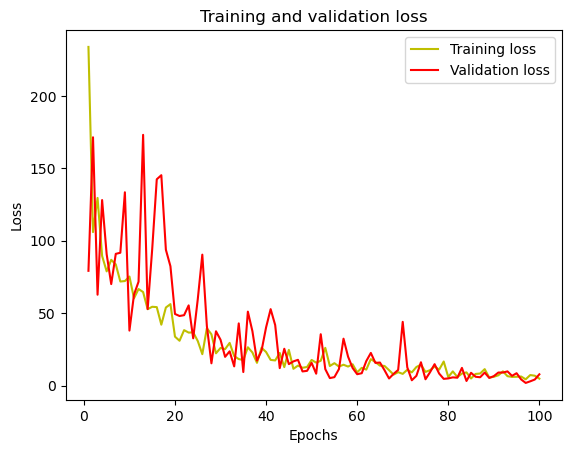

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

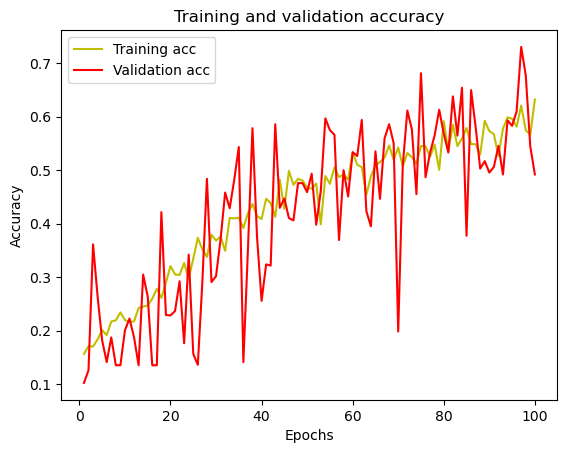

In [36]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_class, y_pred_class, average='macro')
recall = recall_score(y_test_class, y_pred_class, average='macro')
f1 = f1_score(y_test_class, y_pred_class, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.525526714750941
Recall: 0.5044321716764919
F1-score: 0.4207437014013534


C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

accuracy = np.sum(y_test_class == y_pred_class) / len(y_test_class)
print("Accuracy:", accuracy)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

Accuracy: 0.4919236417033774
              precision    recall  f1-score   support

           0       0.40      0.81      0.54       139
           1       1.00      1.00      1.00        56
           2       0.00      0.00      0.00       171
           3       0.94      0.65      0.77       359
           4       0.00      0.00      0.00       184
           5       1.00      0.08      0.14       198
           6       0.33      1.00      0.50       255

    accuracy                           0.49      1362
   macro avg       0.53      0.50      0.42      1362
weighted avg       0.54      0.49      0.41      1362

[[113   0   0   0   0   0  26]
 [  0  56   0   0   0   0   0]
 [161   0   0   0   0   0  10]
 [  0   0   0 232   0   0 127]
 [  5   0   0   1   0   0 178]
 [  1   0   0  12   0  15 170]
 [  0   0   0   1   0   0 254]]


C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
